In [2]:
# import pandas and NumPy to analyze at and manipulate dataset

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats

In [3]:
# decided to only look at specidic columns and rows
columns = ["continent","location","date",'total_cases',"new_cases","total_cases","handwashing_facilities","gdp_per_capita","total_vaccinations","population"]

# load owid-covid-data.xlsx
covid_data = pd.read_csv('owid-covid-data.csv', usecols = columns)

#mean median mode quantile, looking at correlations between variables, look at dv to see trends - distributions, scatter plots, contingency table for cat. data

In [4]:
#check data types of all columns in file
covid_data.info()

#check for missing values
print(covid_data.isnull().sum())

# change all empty spaces to NaN
new_cases = covid_data[covid_data["new_cases"].notna()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235693 entries, 0 to 235692
Data columns (total 9 columns):
continent                 222396 non-null object
location                  235693 non-null object
date                      235693 non-null object
total_cases               222465 non-null float64
new_cases                 222213 non-null float64
total_vaccinations        67258 non-null float64
gdp_per_capita            189896 non-null float64
handwashing_facilities    93524 non-null float64
population                234678 non-null float64
dtypes: float64(6), object(3)
memory usage: 16.2+ MB
continent                  13297
location                       0
date                           0
total_cases                13228
new_cases                  13480
total_vaccinations        168435
gdp_per_capita             45797
handwashing_facilities    142169
population                  1015
dtype: int64


In [5]:
#create a way to readily grab data based on continent and location/country

#continent data
dic_continent = {}
for continent in covid_data.continent.unique():
    dic_continent[continent]=covid_data[covid_data.continent == continent].copy()

#country/ location data
dic_country={}
for country in covid_data.location.unique():
    dic_country[country]=covid_data[covid_data.location == country].copy()


In [6]:
#Compile list of total covid cases in North America
def remove_same(a, b):
    for val in a:
        if val not in b:
            b.append(val)

#create list of just countries in No - countries list
allNA_countries = dic_continent["North America"].location
countries_na = []
remove_same(allNA_countries, countries_na)

#create list of countries in North Americawith reported total cases
total_cases_NA = []
total_cases_NA_normP = [] #normalized for population
countries_NA = []

i = 0
while i < len(countries_na):
    if math.isnan(max(dic_country[countries_na[i]].total_cases)):
        i += 1
    else:
        total_cases_NA.append(max(dic_country[countries_na[i]].total_cases))
        total_cases_NA_normP.append(max(dic_country[countries_na[i]].total_cases)/max(dic_country[countries_na[i]].population))
        countries_NA.append(countries_na[i])
        i += 1


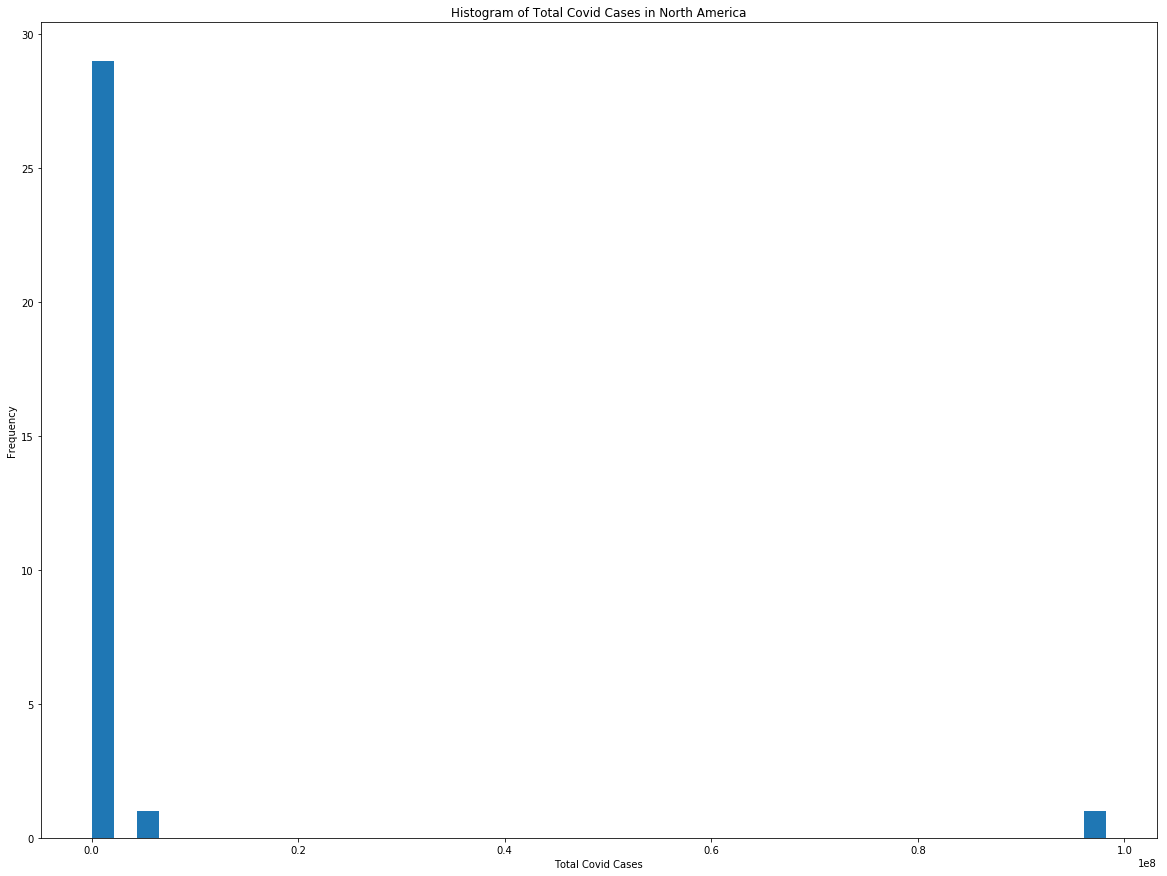

In [86]:
# plot histogram to see distribution
plt.hist(total_cases_NA,bins = 45);
plt.xlabel("Total Covid Cases");
plt.ylabel("Frequency");
plt.title("Histogram of Total Covid Cases in North America");

#distribution of set look poorly distributed 

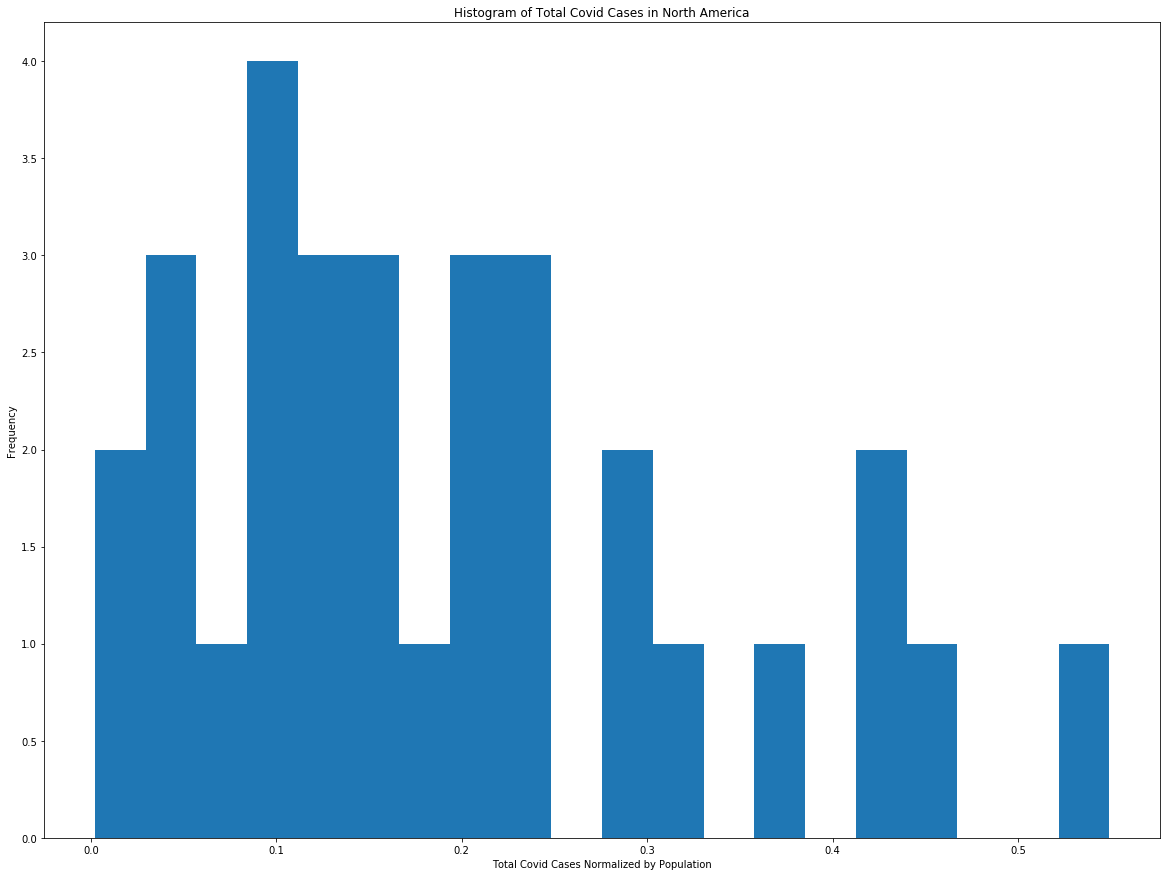

In [89]:
#since distribution looks poor decided to normalize total cases by population 
#plot histogram of total cases and normalize to population
# decided to normailze by population since total cases is dependent on population size

plt.hist(total_cases_NA_normP, bins = 20)
plt.xlabel("Total Covid Cases Normalized by Population");
plt.ylabel("Frequency");
plt.title("Histogram of Total Covid Cases in North America");

#distribution looks better

In [90]:
# Report mean median and standard deviation of total cases
print("Mean, median and standard deviation of total covid cases in North American countries:", np.mean(total_cases_NA), np.median(total_cases_NA), np.std(total_cases_NA))
print("Mean, median and standard deviation of total covid cases in North American countries normalized to population:", np.mean(total_cases_NA_normP), np.median(total_cases_NA_normP),  np.std(total_cases_NA_normP))

Mean, median and standard deviation of total covid cases in North American countries: 3454658.0 31194.0 17325249.89787907
Mean, median and standard of total covid cases in North American countries normalized to population: 0.19514699199960917 0.16507294075787227 0.13769940997538796


In [91]:
# Create a data set to compare North American countries total covid cases and GDP per capita

#create function that will remove reoccuring values
def remove_same(a, b):
    for val in a:
        if val not in b:
            b.append(val)

#create list of just countries in North America - countries list
allNA_countries = dic_continent["North America"].location
countries_na = []
remove_same(allNA_countries, countries_na)

#create list of countries, countries GDPs and total covid cases
GDP_NA = []
totalcasesNA = []
countriesNA = []

i = 0
while i < len(countries_na):
    if math.isnan(max(dic_country[countries_na[i]].gdp_per_capita)) or math.isnan(max(dic_country[countries_na[i]].total_cases)):
        i += 1
    else:
        GDP_NA.append(max(dic_country[countries_na[i]].gdp_per_capita))
        totalcasesNA.append(max(dic_country[countries_na[i]].total_cases)/max(dic_country[countries_na[i]].population))
        countriesNA.append(countries_na[i])
        i += 1

In [95]:
# look at correlation between GDP per capita and total covid cases in North America Countries
GDP = np.asarray(GDP_NA)
NA_case = np.array(totalcasesNA)
stats.pearsonr(GDP, NA_case)

#stats.pearsonr?
#pearson coefficient is 0.642 meaning there is a moderate positive correlation
#p-value is 0.0012, >0.05 meaning it is statistically significant
#appears that there is a moderate positive correlation between the and total cases in North America and GDP

(0.642601845820601, 0.001259248947608598)

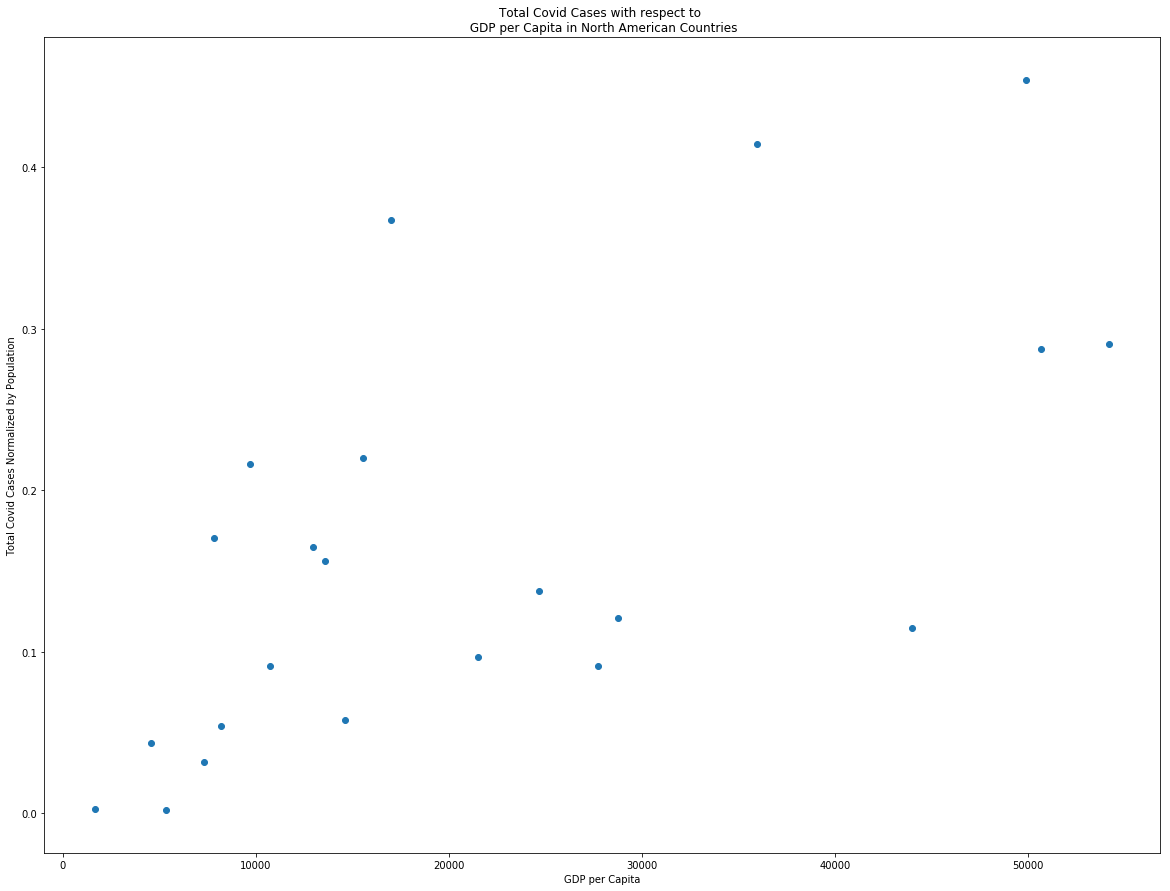

In [96]:
# linear regression analysis

# first plot normally to look at relationship between GDP and total cases reported in North America
plt.scatter(GDP_NA, totalcasesNA)
plt.xlabel("GDP per Capita")
plt.ylabel("Total Covid Cases Normalized by Population")
plt.title("Total Covid Cases with respect to \n GDP per Capita in North American Countries");

# continue with linear regression

Slope, Intercept, R-Value, P-value: 5.126336232739812e-06 0.05442315994101242 0.642601845820601 0.0012592489476085987


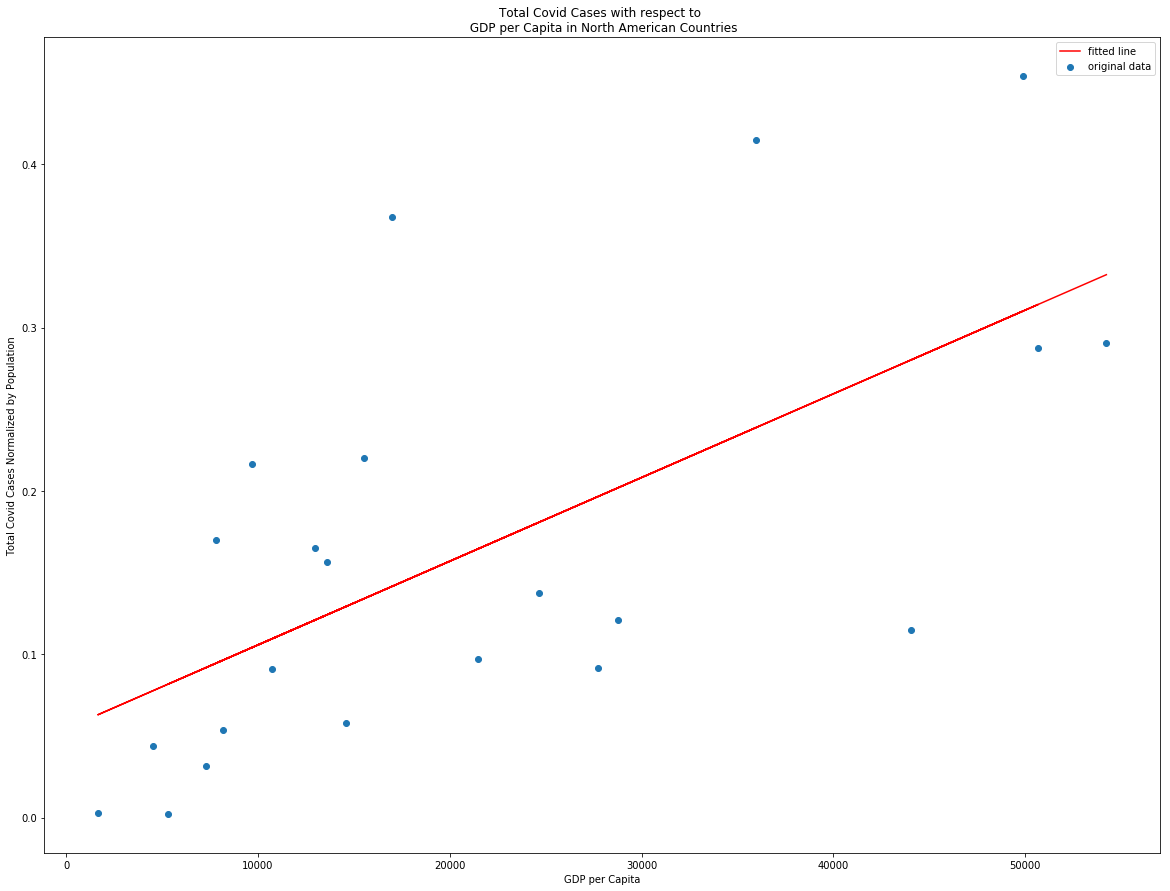

In [97]:
#linear regression continued
fit = stats.linregress(GDP_NA, totalcasesNA)
plt.plot(GDP_NA, fit.intercept + fit.slope*np.array(GDP_NA), 'r', label='fitted line')

plt.scatter(np.array(GDP_NA),np.array(totalcasesNA), label = "original data")
plt.xlabel("GDP per Capita")
plt.ylabel("Total Covid Cases Normalized by Population")
plt.title("Total Covid Cases with respect to \n GDP per Capita in North American Countries");
plt.legend();
print("Slope, Intercept, R-Value, P-value:",fit.slope, fit.intercept, fit.rvalue, fit.pvalue)

# we can conclude that there is a significant correlation between GDP and population normalized total covid cases for countries in North America
# since there is a p-value < 0.05.

Compare total cases in North America and South America and Europe and South America see what is behavior using a t-test
Predict that behaviour of total cases in North America and Europe will be similar while North America and South America wont be since Europe
and North Ameica have developed economies and they will potentially be more equipt to conduct testing.  

In [ ]:
# Hypothesis testing: t-test

#create function that will remove reoccuring values
def remove_same(a, b):
    for val in a:
        if val not in b:
            b.append(val)

#create list of just countries in North America - countries list
allSA_countries = dic_continent["South America"].location
countries_sa = []
remove_same(allSA_countries, countries_sa)

#create list of countries, countries GDPs and total covid cases
GDP_SA = []
totalcasesSA = []
countriesSA = []

i = 0
while i < len(countries_sa):
    if math.isnan(max(dic_country[countries_sa[i]].gdp_per_capita)) or math.isnan(max(dic_country[countries_sa[i]].total_cases)):
        i += 1
    else:
        GDP_SA.append(max(dic_country[countries_sa[i]].gdp_per_capita))
        totalcasesSA.append(max(dic_country[countries_sa[i]].total_cases)/max(dic_country[countries_sa[i]].population))
        countriesSA.append(countries_sa[i])
        i += 1

In [100]:
#create function that will remove reoccuring values
def remove_same(a, b):
    for val in a:
        if val not in b:
            b.append(val)

#create list of just countries in North America - countries list
allE_countries = dic_continent["Europe"].location
countries_e = []
remove_same(allE_countries, countries_e)

#create list of countries, countries GDPs and total covid cases
GDP_E = []
totalcasesE = []
countriesE = []

i = 0
while i < len(countries_e):
    if math.isnan(max(dic_country[countries_e[i]].gdp_per_capita)) or math.isnan(max(dic_country[countries_e[i]].total_cases)):
        i += 1
    else:
        GDP_SA.append(max(dic_country[countries_e[i]].gdp_per_capita))
        totalcasesE.append(max(dic_country[countries_e[i]].total_cases)/max(dic_country[countries_e[i]].population))
        countriesE.append(countries_e[i])
        i += 1

In [104]:
#Get mean, median and standard deviation of total cases

print("Mean of total cases in North America, South America and Europe:", np.mean(totalcasesNA),np.mean(totalcasesSA),np.mean(totalcasesE))
print("Median of total cases in North America, South America and Europe:", np.median(totalcasesNA),np.median(totalcasesSA),np.median(totalcasesE))
print("Standard Deviation of total cases in North America, South America and Europe:", np.std(totalcasesNA),np.std(totalcasesSA),np.std(totalcasesE))

Mean of total cases in North America, South America and Europe: 0.1630764072420625 0.1330655484374399 0.3390299959244969
Median of total cases in North America, South America and Europe: 0.12915364129111417 0.12223933944068671 0.3339338911287593
Standard Deviation of total cases in North America, South America and Europe: 0.1266931619662187 0.07842280828668233 0.16330034457336606


In [101]:
# Hypothesis testing: t-test
# Test total cases in North America and South America 

stats.ttest_ind(totalcasesSA, totalcasesNA)
# result is stat = -0.6693 and pvalue = 0.5083
# supports the null hypothesis that there is no real difference in behaviour between total reported covid cases in North America and South America

Ttest_indResult(statistic=-0.66933988085034, pvalue=0.5083976346649299)

In [102]:
# Hypothesis testing: t-test
# Test total cases in North America and Europe

stats.ttest_ind(totalcasesE, totalcasesNA)
# result is stat = 4.1045 and pvalue = 0.00015
# rejects the null hypothesis that there is a significant difference between the total reported covid cases in North America and Europe

Ttest_indResult(statistic=4.1045153845569144, pvalue=0.0001528445052838512)

My prediction that behaviour of total cases in North America and Europe would be similar while North America and South America won't is inaccurate. I would need to do more testing to make a predicition as to why that is. My guess would lead into understanding how testing was implemented in each continent and seeing if thers is a geographical significance on testing.

In [ ]:
#OTHER PLOTS and ANALYSIS

In [80]:
# Hypothesis testing: t- test
# Define hypothesis, null hypothesis = H0, alternate hypothesis = H1 
# Test GDP of countries with vaccinated people in North America and Africa

#create function that will remove reoccuring values
def remove_same(a, b):
    for val in a:
        if val not in b:
            b.append(val)

# get data on total vaccinated and countries with GDP
#create list of just countries in North America - countries list
allNA_countries = []
allSA_countries = dic_continent["North America"].location
countries_na = []
remove_same(allNA_countries, countries_na)

allA_countries = []
allA_countries = dic_continent["Africa"].location
countries_a = []
remove_same(allA_countries, countries_a)

#create list of countries, countries GDPs and total covid cases
GDP_NA_vax = []
GDP_A_vax = []
NAtotal_vax = []
Atotal_vax = []
countriesNA = []
countriesA = []

#create list with all vaxinated North American countries
j = 0
while j < len(countries_na):
    if math.isnan(max(dic_country[countries_na[j]].gdp_per_capita)) or max(dic_country[countries_na[j]].total_vaccinations.replace(np.nan, 0)) == 0: 
        j += 1
    else:
        GDP_NA_vax.append(max(dic_country[countries_na[j]].gdp_per_capita))
        NAtotal_vax.append(max(dic_country[countries_na[j]].total_vaccinations.replace(np.nan, 0)))#/max(dic_country[countries_na[j]].population))
        countriesNA.append(countries_na[j])
        j += 1

#create list with all vaxinated African countries
j = 0
while j < len(countries_a):
    if math.isnan(max(dic_country[countries_a[j]].gdp_per_capita)) or max(dic_country[countries_a[j]].total_vaccinations.replace(np.nan, 0)) == 0: 
        j += 1
    else:
        GDP_A_vax.append(max(dic_country[countries_a[j]].gdp_per_capita))
        Atotal_vax.append(max(dic_country[countries_a[j]].total_vaccinations.replace(np.nan, 0)))#/max(dic_country[countries_na[j]].population))
        countriesA.append(countries_a[j])
        j += 1
        
res = stats.ttest_ind(NAtotal_vax, Atotal_vax)

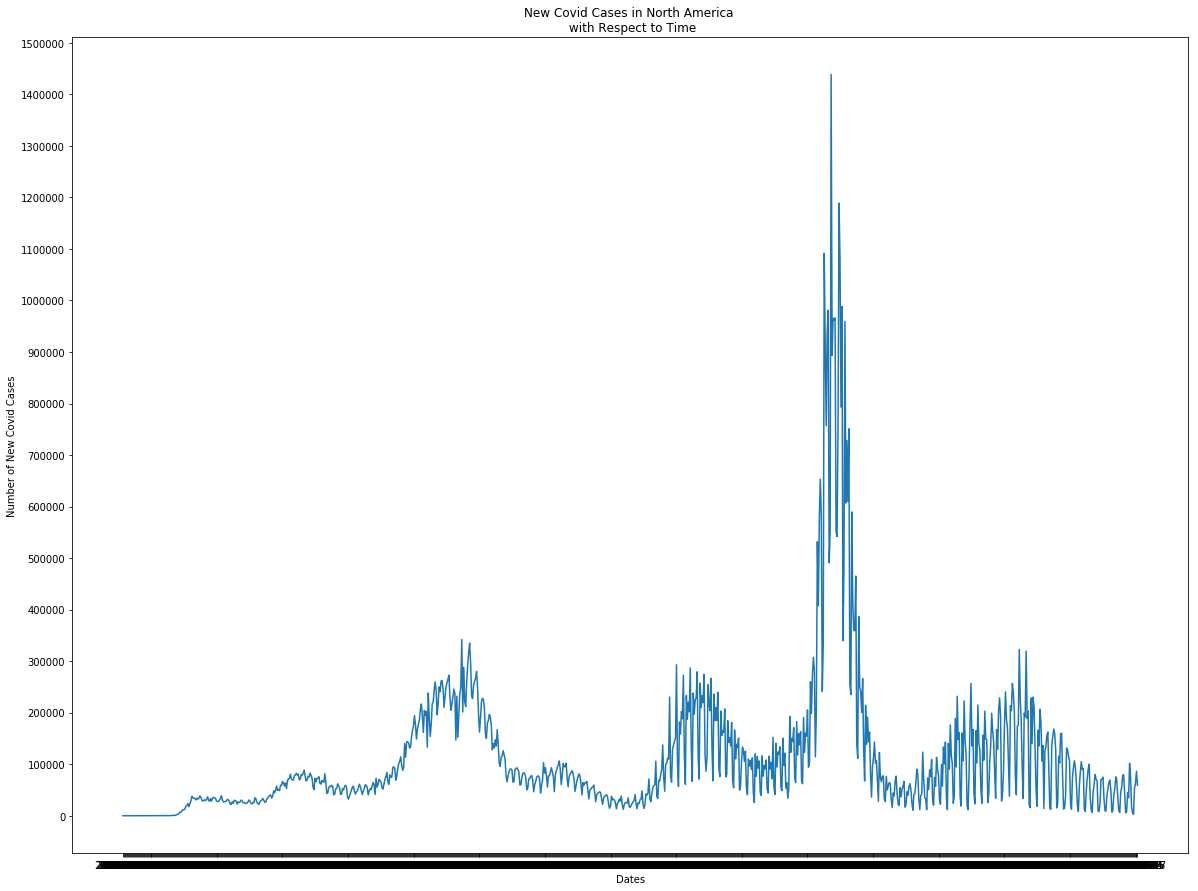

In [33]:
# look at covid behaviour as a time series 
dates = dic_country["North America"].date
new_NA_cases = dic_country["North America"].new_cases
plt.plot(dates, new_NA_cases)
plt.rcParams['figure.figsize'] = (20,15)
plt.locator_params(axis='y', nbins = 20)
plt.xlabel("Dates")
plt.ylabel("Number of New Covid Cases")
plt.title("New Covid Cases in North America \n with Respect to Time");

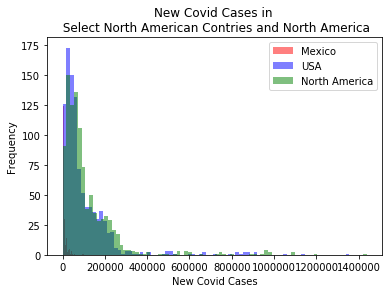

In [22]:
# pull data from Mexico remove NaN values 
# want to ignore rows with NaN and zero values
Mexico_cases = dic_country["Mexico"].new_cases
Mexico_cases = Mexico_cases[Mexico_cases != 0]

plt.hist(Mexico_cases.dropna(),label = "Mexico", bins = 80, alpha = 0.5, color = 'red')

# pull data from USA remove NaN values 
# want to ignore rows with NaN and zero values
USA_cases = dic_country["United States"].new_cases
USA_cases = USA_cases[USA_cases != 0]

plt.hist(USA_cases.dropna() , label = "USA", bins = 78, alpha = 0.5, color = 'blue')

# pull data from all of Nouth America remove NaN values 
# want to ignore rows with NaN and zero values
NA_cases = dic_country["North America"].new_cases
NA_cases = NA_cases[NA_cases.dropna() != 0]

plt.hist(NA_cases, label = "North America", bins = 80, alpha = 0.5, color = 'green');

plt.legend(loc= "upper right")
plt.xlabel("New Covid Cases")
plt.ylabel("Frequency")
plt.title("New Covid Cases in \n Select North American Contries and North America");

In [23]:
# look at mean and standard deviations for new covid cases 
print("Standard Deviations of new covid cases of Mexico, USA and all of Nouth America:",np.std(Mexico_cases), np.std(USA_cases), np.std(NA_cases))
print("Mean of new covid cases of Mexico, USA and all of Nouth America:               ",np.mean(Mexico_cases), np.mean(USA_cases), np.mean(NA_cases))

Standard Deviations of new covid cases of Mexico, USA and all of Nouth America: 11427.731271721037 132574.76595419174 146452.97273186233
Mean of new covid cases of Mexico, USA and all of Nouth America:                8435.798578199052 97952.08275174476 114426.6116027532
